In [ ]:
# G4_15
# 3IIR - G4
# Netflix
# ihssane ERRAQI fatima ezzahra ELMOUS

In [2]:
#pour importer les packages
import numpy as np
import io
import pandas as pd
#pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#pour la question des contenus similaires
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
#ouvrir la base de données
#df pour dataframe nom de base données
#pd pour pandas et fonction read pour lire le fichier de databse de type csv
#et le chemin de la database entre parentheses
from google.colab  import files
uploaded = files.upload()


Saving netflix.csv to netflix.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['netflix.csv']))
print(df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [5]:
#informations par rapport aux colonnes
df.info()
#pour object il faut modifier pour faire des calculs puisque c'est pas numerique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
#pour les variables numeriques
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


nettoyage de données

In [7]:
#pour savoir si on a des lignes repetées on utilise la fct duplicated
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [ ]:
#pour savoir si on a des lignes repetées on utilise la fct duplicated et sum pour la somme
df.duplicated().sum()

0

In [8]:
#pour supprimer les lignes repetées si jamais
#inplace=True pour que ce soit modifier dans la database aussi
df.drop_duplicates(inplace=True)

In [10]:
#pour decouvrire les valeurs manquantes
#is null est une fonction de pandas
df.isnull().sum()
#ici par exemple on a 2082 films sans directeurs
#ou encore 337 films sans ratings

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
#pour afficher les titres des colonnes
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Analyse exploratoire


In [ ]:
#pour valeurs numeriques
#moyenne d'une colonne par exemple la colonne release year parce que c'est elle qu'est en numerique
df['release_year'].mean()

2014.1801975701146

In [13]:
#pour savoir combien de films on a pour chaque type
#ici on remarque que on a que deux types qui sont Movie et TV Show
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [14]:
#meme chose pour country on veut savoir combien de films a ete realise dans quel pays
df['country'].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

<Axes: ylabel='Frequency'>

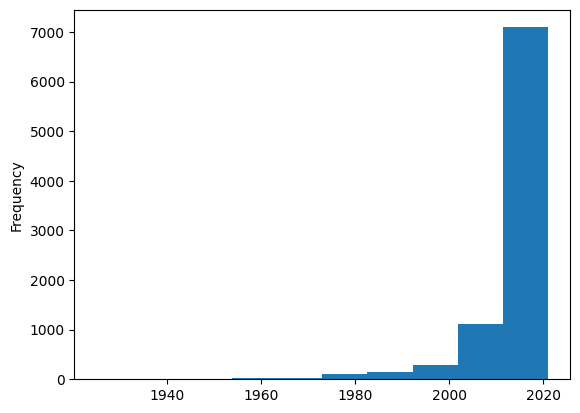

In [15]:
df['release_year'].plot(kind='hist')

In [16]:
#pour compter le nombre d'occurrences de chaque réalisateur
directors_count = df["director"].value_counts()

#et ici l'affichage des 5 premiers réalisateurs les plus populaires
top_directors = directors_count.head(5)
print(top_directors)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: count, dtype: int64


In [17]:
#pour compter le nombre d'occurrences de chaque categorie
categories_count = df["listed_in"].value_counts()

#afficher les 5 premiers categories les plus populaires
top_categories = categories_count.head(5)
print(top_categories)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64


In [19]:
#compter le nombre d'occurrences de chaque acteur
actors_count = df["cast"].str.split(",", expand=True).stack().str.strip().value_counts()

#afficher les 10 premiers acteurs les plus populaires
top_actors = actors_count.head(10)
print(top_actors)


Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64


In [20]:
#extraire les séries TV du DataFrame
tv_shows = df[df["type"] == "TV Show"]

#trier les séries TV par nombre de saisons
tv_shows_sorted = tv_shows.sort_values("duration", ascending=False)

#afficher les cinq séries TV avec le plus grand nombre de saisons
top_5_tv_shows = tv_shows_sorted.head(5)
print("Les cinq meilleures séries télévisées avec le plus grand nombre de saisons :")
print(top_5_tv_shows[["show_id","title", "duration"]])

Les cinq meilleures séries télévisées avec le plus grand nombre de saisons :
     show_id                          title   duration
1480   s1481                     Still Game  9 Seasons
6504   s6505       Club Friday The Series 6  9 Seasons
67       s68              Saved by the Bell  9 Seasons
1998   s1999               Call the Midwife  9 Seasons
8         s9  The Great British Baking Show  9 Seasons


In [22]:
#créer un vecteur de caractéristiques pour les descriptions des contenus
vectorizer = CountVectorizer(stop_words='english')
features = vectorizer.fit_transform(df['description'].fillna(''))

#calculer la similarité cosinus entre chaque paire de contenus
cosine_sim = cosine_similarity(features)

#trouver les contenus similaires à "The Great British Baking Show"
title = "The Great British Baking Show"
index = df[df['title'] == title].index[0]
similar_content = list(enumerate(cosine_sim[index]))
sorted_similar_content = sorted(similar_content,key=lambda x:x[1],reverse=True)[1:10]

#afficher les contenus similaires
print("Contenus similaires à ", title)
for content in sorted_similar_content:
    print(df.iloc[content[0]]['title'])

Contenus similaires à  The Great British Baking Show
The Great British Baking Show: The Beginnings
Talentime
LEGO Friends: The Power of Friendship
The Circle Brazil
The Big Family Cooking Showdown
Forged in Fire
Nailed It! France
Chef & My Fridge
Dancing with the Birds


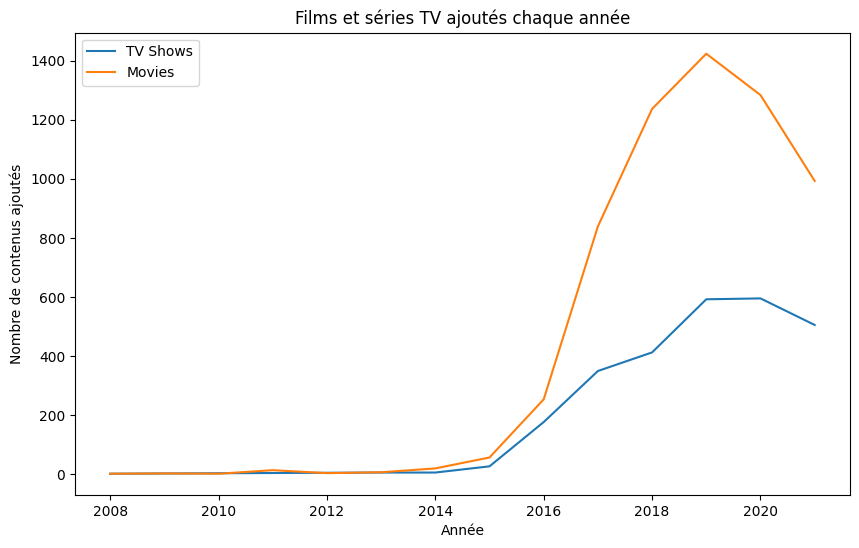

In [24]:
#comparer le nombre de films et de séries TV ajoutés chaque année
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
tv_shows_added = df[df["type"] == "TV Show"].groupby('year_added').size()
movies_added = df[df["type"] == "Movie"].groupby('year_added').size()

#tracer un graphique pour comparer le nombre de films et de séries TV ajoutés chaque année
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tv_shows_added.index, tv_shows_added.values, label='TV Shows')
ax.plot(movies_added.index, movies_added.values, label='Movies')
ax.set_title('Films et séries TV ajoutés chaque année')
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de contenus ajoutés')
ax.legend()
plt.show()

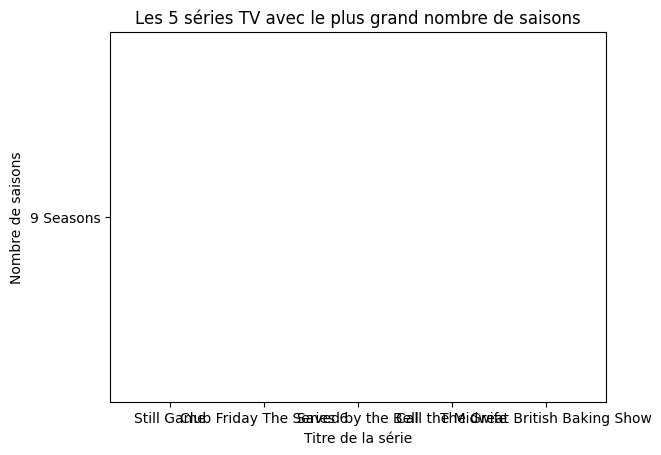

In [25]:
#sélectionner les données pour les séries TV uniquement
tv_shows = df[df["type"] == "TV Show"]

#trier les séries TV par nombre de saisons décroissant
sorted_tv_shows = tv_shows.sort_values("duration", ascending=False)

#extraire les 5 séries TV avec le plus grand nombre de saisons
top_tv_shows = sorted_tv_shows.head(5)

#afficher un diagramme à barres pour les 5 séries TV avec le plus grand nombre de saisons
plt.bar(top_tv_shows["title"], top_tv_shows["duration"])
plt.title("Les 5 séries TV avec le plus grand nombre de saisons")
plt.xlabel("Titre de la série")
plt.ylabel("Nombre de saisons")
plt.show()